duplicate exit
body        2380
title       2380
category    2380
dtype: int64
['Engineering' 'Startups & Business' 'Product & Design']
               category  cat_id
0           Engineering       0
7   Startups & Business       1
57     Product & Design       2


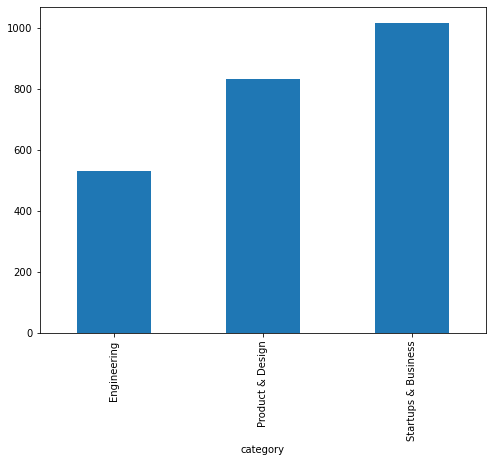

view details about data body for 2 n-grams
# 'Engineering':
  . Most correlated unigrams:
. server
. microservices
  . Most correlated bigrams:
. deep learning
. open source
# 'Product & Design':
  . Most correlated unigrams:
. design
. designers
  . Most correlated bigrams:
. product manager
. product managers
# 'Startups & Business':
  . Most correlated unigrams:
. founders
. investors
  . Most correlated bigrams:
. product manager
. product managers


In [1]:
import pandas as pd
import json    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



train_data = []
#read json file into datframe
with open ('articles.json') as f_train : train_data = json.load(f_train)
df = pd.DataFrame (train_data, columns = ['body','title','category'])  

#clean data 


# check if there is a duplicate body 

from collections import Counter
c = Counter(df['body'])
c.most_common(1)
#print ("",c.most_common(1))
#rint ("length =" ,len(c))
orginalLength = (len(df['body']))
commLength = len(c)
if (commLength<orginalLength): print ('duplicate exit')
#remove duplicate row that contains duplicate body 
#keep first 
df.drop_duplicates(subset ="body",keep = 'first', inplace = True)
print(df.count()) # Size after remove duplicates 
#CHECK ALL CATEGORY 
print(pd.unique(df['category']))#3 CLASS  ['Engineering', 'Startups & Business', 'Product & Design']

df['cat_id']=df['category'].factorize()[0]; #map category to id from 0 to 2 

category_id_df = df[['category', 'cat_id']].drop_duplicates().sort_values('cat_id')

id_to_category = (category_id_df[['cat_id', 'category']].values)

category_to_id = dict(category_id_df.values)

print (category_id_df)
id_to_category
category_to_id
category_to_id = dict(category_id_df.values)

#df.head()
#plot data 
#plot data to check if it is imbalanced or not 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').body.count().plot.bar(ylim=0)
plt.show()

print ("view details about data body for 2 n-grams")

tfidf = TfidfVectorizer(analyzer='word', sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.body).toarray()
labels = df.cat_id
features.shape


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.body).toarray()
labels = df.cat_id
features.shape

from sklearn.feature_selection import chi2
import numpy as np
N=2
for category, cat_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == cat_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
